# Метод наименьших квадратов

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [2]:
hess_f = lambda x, y: np.array([
    [part_f_xx(x, y), part_f_xy(x, y)], 
    [part_f_yx(x, y), part_f_yy(x, y)]
])

def get_minors(matrix):
    for i in range(matrix.shape[0]):
        yield np.linalg.det(matrix[:i+1, :i+1]).round(3)

## 1

Определите наибольшую вместимость цилиндрического бака, если площадь его
поверхности (без крышки) равна 30 $м^2$

### Cпособ 1

$$
V(r,h) = \pi r^2h
$$

$$
S(r, h) =  S_{осн} + S_{бок} = \pi r^2 + 2\pi rh = 30
$$

$$
h = \frac{30-\pi r^2}{2\pi r}
$$

$$
V(r) = \frac{\pi r^2(30-\pi r^2)}{2 \pi r} = 
\frac{r(30-\pi r^2)}{2}
$$

$$
\frac{dV}{dr} = -\frac{3}{2}\pi r^2 + 15 = 0 =>
r = \sqrt{\frac{10}{\pi}}
$$

$$
\frac{d^2V}{dr^2} = -3\pi r < 0 => локальный\thinspaceмаксимум
$$

$$
h = \sqrt{\frac{10}{\pi}}
$$

$$
V = \pi \frac{10}{\pi}\sqrt{\frac{10}{\pi}} = 10\sqrt{\frac{10}{\pi}} \approx 17.84
$$

In [3]:
v = lambda r, h: np.pi*r**2*h
s = lambda r, h: np.pi*r**2 + 2*np.pi*r*h
h = lambda r: (30 - np.pi*r**2) / (2*np.pi*r)
v30 = lambda r: 0.5*r*(30-np.pi*r**2)

In [4]:
r1 = np.sqrt(10 / np.pi)
h1 = h(r1)
r1, h1

(1.7841241161527712, 1.784124116152771)

In [5]:
s(r1, h1), v(r1, h1)

(30.0, 17.84124116152771)

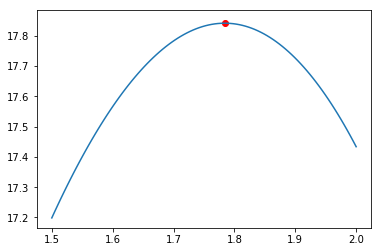

In [6]:
r = np.linspace(1.5, 2, 100)

plt.plot(r, v30(r))
plt.scatter(r1, v30(r1), marker='o', color='red')
plt.show()

plt.show()

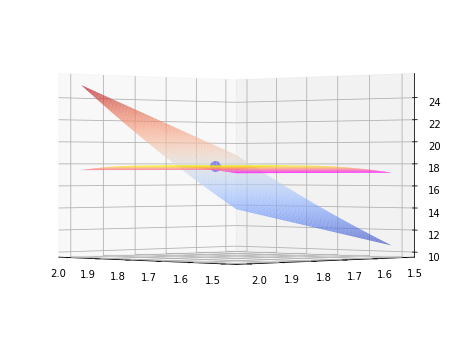

In [7]:
R, H = np.meshgrid(np.linspace(1.5, 2, 100), np.linspace(1.5, 2, 100))

fig = plt.figure(figsize=(8, 6))
ax = fig.gca(projection='3d')

ax.plot_surface(R, H, v(R, H), cmap=cm.coolwarm, alpha=0.8)
ax.plot_surface(R, H, v30(R), cmap=cm.spring, alpha=1.0)
ax.scatter(r1, h1, v(r1, h1), marker='o', color='b', s=100)

ax.view_init(elev=0, azim=135)

plt.show()

### Cпособ 2

$$
L(r,h,\lambda) = \pi r^2h -\lambda(\pi r^2+2\pi rh - 30)
$$

$$
\frac{\partial L}{\partial r} = 
2\pi rh - \lambda 2\pi r - \lambda 2\pi h
$$

$$
\frac{\partial L}{\partial h} = 
\pi r^2 - \lambda 2\pi r
$$

$$
\frac{\partial L}{\partial \lambda} = 
-(\pi r^2+2\pi rh-30)
$$

$$
\frac{\partial L}{\partial r} = 
2\pi rh - \lambda 2\pi r - \lambda 2\pi h = 0 =>
\lambda = \frac{rh}{r+h}
$$

$$
\frac{\partial L}{\partial h} = 
\pi r^2 - \lambda 2\pi r = 0 => \lambda = \frac{r}{2}
$$

$$
\lambda = \frac{rh}{r+h} = \frac{r}{2} => r = h
$$

$$
\frac{\partial L}{\partial \lambda} = 
-(\pi r^2+2\pi rh-30) = 0 = > \pi r^2+2\pi r^2-30 = 0; \enspace
r > 0 => r = \sqrt{\frac{10}{\pi}} = h =>
\lambda = \sqrt{\frac{5}{2\pi}}
$$

Проверим, что найденное значение максимум:

$$
V(r,h) = \pi r^2h
$$

$$
S(r, h) = \pi r^2 + 2\pi rh
$$

$$
\frac{\partial^2 L}{\partial r^2} = 
2\pi h - 2\pi\lambda, \enspace
\frac{\partial^2 L}{\partial h^2} = 0, \enspace
\frac{\partial^2 L}{\partial r \partial h} = \frac{\partial^2 L}{\partial h \partial r} = 
2\pi r - 2\pi\lambda, \enspace
$$

$$
\frac{\partial S}{\partial r} = 
2\pi r - 2\pi h, \enspace
\frac{\partial S}{\partial h} = 
2\pi r
$$

In [8]:
# первые производные S
part_g_r = lambda r, h: 2*np.pi*r + 2*np.pi*h
part_g_h = lambda r, h: 2*np.pi*r

# вторые производные L
part_L_rr = lambda r, h, l: 2*np.pi*h - 2*np.pi*l
part_L_hh = lambda r, h, l: 0
part_L_rh = part_L_hr = lambda r, h, l: 2*np.pi*r - 2*np.pi*l

In [9]:
# окаймленный гессиан
hess = lambda r, h, l: np.array([
    [0,              part_g_r(r, h),     part_g_h(r, h)],
    [part_g_r(r, h), part_L_rr(r, h, l), part_L_rh(r, h, l)],
    [part_g_h(r, h), part_L_hr(r, h, l), part_L_hh(r, h, l)],
])

In [10]:
r = h = np.sqrt(10 / np.pi)
l = np.sqrt(5 / (2*np.pi))

In [11]:
# n-m = 2-1 = 1 => смотрим знак первого минора с конца

np.linalg.det((hess(r, h, l)))

2113.031907464527

Знак минора положительный, что совпадает со знаком $(-1)^n = (-1)^2 = +1$ => матрица отрицательно определена => локальный максимум

In [12]:
grad_s = lambda r, h: np.array([part_g_r(r, h), part_g_h(r, h)])
grad_v = lambda r, h: np.array([2*np.pi*r*h, np.pi*r**2])

In [13]:
grad_v(r, h) / grad_s(r, h), l

(array([0.89206206, 0.89206206]), 0.8920620580763856)

## 2.a

Найдите локальные минимумы и максимумы функции $f(x) = (x-3)^6$

$$
\frac{df}{dx} = 6(x-3)^5 = 0 => x = 3
$$

$$
\frac{d^2f}{dx^2} = 30(x-3)^4
$$

$$
\frac{d^2f(3)}{dx^2} = 0 => x = 3 - седловая \thinspace точка
$$

Локальных минимумов и максимумов нет.

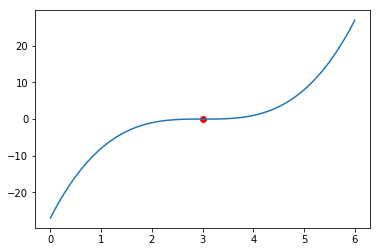

In [14]:
f = lambda x: (x-3)**3
x = np.linspace(0, 6, 100)

plt.plot(x, f(x))
plt.scatter(3, f(3), marker='o', color='red')
plt.show()

## 2.b

Найдите локальные минимумы и максимумы функции $f(x) = ln(\sqrt{1+x^2}) + arctg(x)$

$$
\frac{df}{dx} = 
(1+x^2)^{-\frac{1}{2}}\cdot\frac{1}{2}(1+x^2)^{-\frac{1}{2}}\cdot2x + (1+x^2)^{-1} =
\frac{x+1}{x^2+1} = 0 => x = -1
$$

$$
\frac{d^2f}{dx^2} = 
1(x^2+1) + 2x(x+1)
$$

$$
\frac{d^2f(-1)}{dx^2} = 2 > 0 => x = -1 - локальный \thinspace минимум
$$

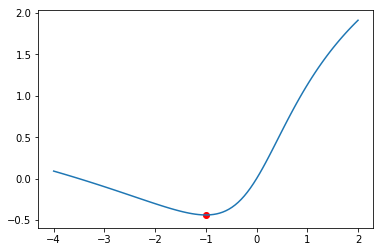

In [15]:
f = lambda x: np.log(np.sqrt(1+x**2)) + np.arctan(x)
x = np.linspace(-4, 2, 100)

plt.plot(x, f(x))
plt.scatter(-1, f(-1), marker='o', color='red')
plt.show()

## 2.c

Найдите локальные минимумы и максимумы функции $f(x,y) = x^2y^2+\frac{x^2+y^2}{2}+xy+1$

$$
\frac{\partial f}{\partial x} = 
2y^2x + x + y
$$

$$
\frac{\partial f}{\partial y} = 
2x^2y + y + x
$$

$$
2y^2x + x + y = 0 = 2x^2y + x + y => x =y
$$

$$
\frac{\partial f}{\partial x} = 
2x^2x + x + x = 2x(x^2+1) = 0 => x=0
$$

$$
\frac{\partial^2 f}{\partial x^2} = 
2y^2+1; \enspace
\frac{\partial^2 f}{\partial y^2} = 
2x^2+1; \enspace
\frac{\partial^2 f}{\partial x\partial y} = \frac{\partial^2 f}{\partial y\partial x} =
4yx+1
$$

In [16]:
f = lambda x, y: x**2*y**2 + 0.5*(x**2+y**2) + x*y + 1

part_f_x = lambda x, y: 2*y**2*x + x + y
part_f_y = lambda x, y: 2*x**2*y + y + x

part_f_xx = lambda x, y: 2*y**2 + 1
part_f_yy = lambda x, y: 2*x**2 + 1
part_f_xy = part_f_yx = lambda x, y: 4*x*y + 1

In [17]:
x1, y1 = 0, 0

In [18]:
part_f_x(x1, y1), part_f_y(x1, y1)

(0, 0)

In [19]:
# Посчитаем миноры гессиана для 1ой точки

h1 = hess_f(x1, y1)
list(get_minors(h1))

[1.0, 0.0]

Матрица не строго положительно определена => (0, 0) локальный минимум

Проверим:

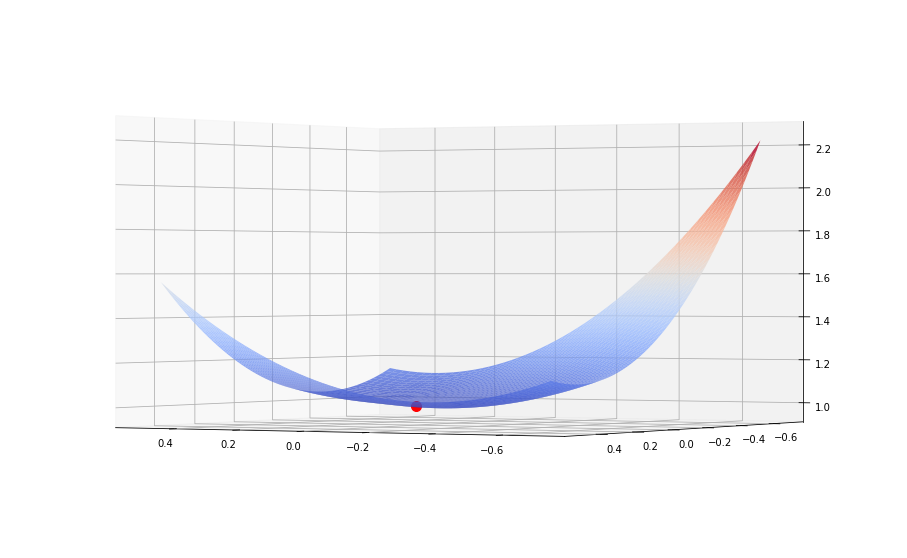

In [20]:
X, Y = np.meshgrid(np.linspace(-0.7, 0.5, 1000), np.linspace(-0.7, 0.5, 1000))

fig = plt.figure(figsize=(16, 10))

ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, f(X, Y), cmap=cm.coolwarm, alpha=0.8)
ax.scatter(x1, y1, f(x1, y1), marker='o', color='r', s=100)
ax.view_init(elev=0, azim=120)

plt.show()

## 2.d

Найдите локальные минимумы и максимумы функции $f(x,y) = x^3 + y^3 - 3xy$

$$
\frac{\partial f}{\partial x} = 
3x^2 - 3y
$$

$$
\frac{\partial f}{\partial y} = 
3y^2 - 3x
$$

$$
3x^2 - 3y = 0 = 3y^2 - 3x => -3(x^2-y^2) = 3(x-y) => y = -x
$$

$$
\frac{\partial f}{\partial x} = 
3x^2 + 3x = 0 => x=0, x=-1
$$

$$
\frac{\partial^2 f}{\partial x^2} = 
6x;
\frac{\partial^2 f}{\partial y^2} = 
6y;
\frac{\partial^2 f}{\partial x\partial y} = \frac{\partial^2 f}{\partial y\partial x} =
-3
$$

In [21]:
f = lambda x, y: x**3 + y**3 - 3*x*y

part_f_x = lambda x, y: 3*x**2-3*y
part_f_y = lambda x, y: 3*y**2-3*x

part_f_xx = lambda x, y: 6*x
part_f_yy = lambda x, y: 6*y
part_f_xy = part_f_yx = lambda x, y: -3

In [22]:
x1, y1 = 0, 0
x2, y2 = 1, 1

In [23]:
print(part_f_x(x1, y1), part_f_y(x1, y1))
print(part_f_x(x2, y2), part_f_y(x2, y2))

0 0
0 0


In [24]:
# Посчитаем миноры гессиана для 1ой точки

h1 = hess_f(x1, y1)
list(get_minors(h1))

[0.0, -9.0]

Неопределенный вариант => (0, 0) седловая точка

In [25]:
# Посчитаем миноры гессиана для 2ой точки

h2 = hess_f(x2, y2)
list(get_minors(h2))

[6.0, 27.0]

Неопределенный вариант => (1, 1) локальный минимум

Проверим:

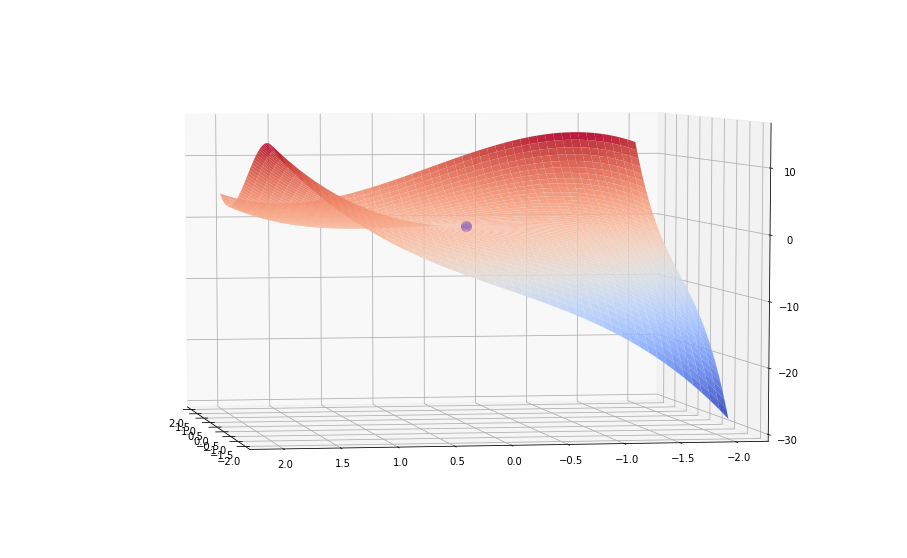

In [26]:
# Первая точка

X, Y = np.meshgrid(np.linspace(-2, 2, 1000), np.linspace(-2, 2, 1000))

fig = plt.figure(figsize=(16, 10))

ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, f(X, Y), cmap=cm.coolwarm, alpha=0.9)
ax.scatter(x1, y1, f(x1, y1), marker='o', color='b', s=100)
ax.view_init(elev=5, azim=170)

plt.show()

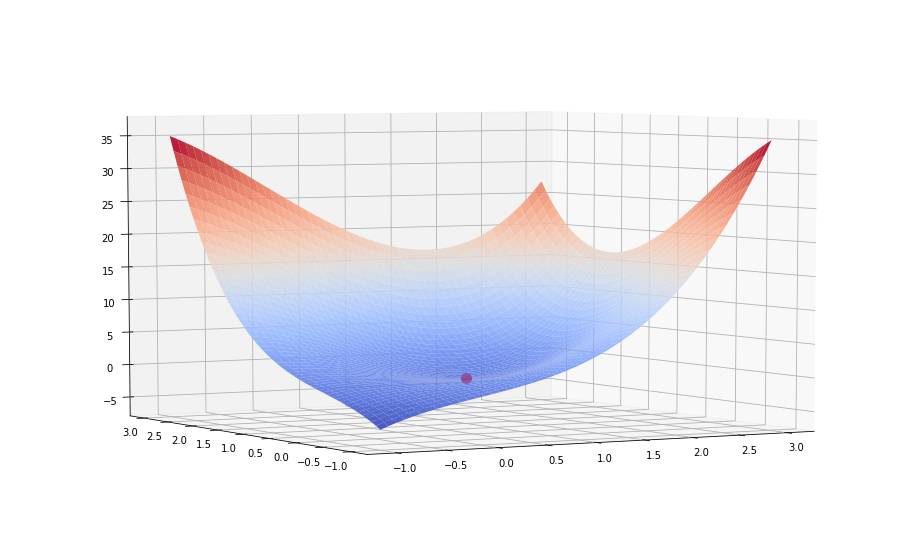

In [27]:
# Вторая точка

X, Y = np.meshgrid(np.linspace(-1, 3, 1000), np.linspace(-1, 3, 1000))

fig = plt.figure(figsize=(16, 10))

ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, f(X, Y), cmap=cm.coolwarm, alpha=0.9)
ax.scatter(x2, y2, f(x2, y2), marker='o', color='r', s=100)
ax.view_init(elev=5, azim=240)

plt.show()

## 2.e

Найдите локальные минимумы и максимумы функции $f(x,y) = e^{2x}(x+y^2-2y)$

$$
\frac{\partial f}{\partial x} = 
e^{2x}\cdot2\cdot(x+y^2-2y) + 1 \cdot e^{2x} =
2e^{2x}(x+y^2-2y+0.5)
$$

$$
\frac{\partial f}{\partial y} = 
2(y-1)e^{2x}
$$

$$
2e^{2x}(x+y^2-2y+0.5) = 0 = 2(y-1)e^{2x} => 
x = -y^2+y+0.5)
$$

$$
\frac{\partial f}{\partial y} = 
2(y-1)e^{2x} = 0 => y=1
$$

$$
\frac{\partial^2 f}{\partial x^2} = 
4e^{2x}(x+y^2-2y+0.5) + 2e^{2x}
$$

$$
\frac{\partial^2 f}{\partial y^2} = 
2e^{2x}
$$

$$
\frac{\partial^2 f}{\partial x\partial y} = \frac{\partial^2 f}{\partial y\partial x} =
4(y-1)e^{2x}
$$

In [28]:
f = lambda x, y: np.exp(2*x) * (x + y**2 - 2*y)

part_f_x = lambda x, y: 2*np.exp(2*x)*(x+y**2-2*y+0.5)
part_f_y = lambda x, y: 2*(y-1)*np.exp(2*x)

part_f_xx = lambda x, y: 4*np.exp(2*x)*(x+y**2-2*y+0.5) + 2*np.exp(2*x)
part_f_yy = lambda x, y: 2*np.exp(2*x)
part_f_xy = part_f_yx = lambda x, y: 4*(y-1)*np.exp(2*x)

In [29]:
x1, y1 = 0.5, 1

In [30]:
part_f_x(x1, y1), part_f_y(x1, y1)

(0.0, 0.0)

In [31]:
# Посчитаем миноры гессиана для 1ой точки

h1 = hess_f(x1, y1)
list(get_minors(h1))

[5.437, 29.556]

Матрица положительно определена => (0.5, 1) локальный минимум

Проверим:

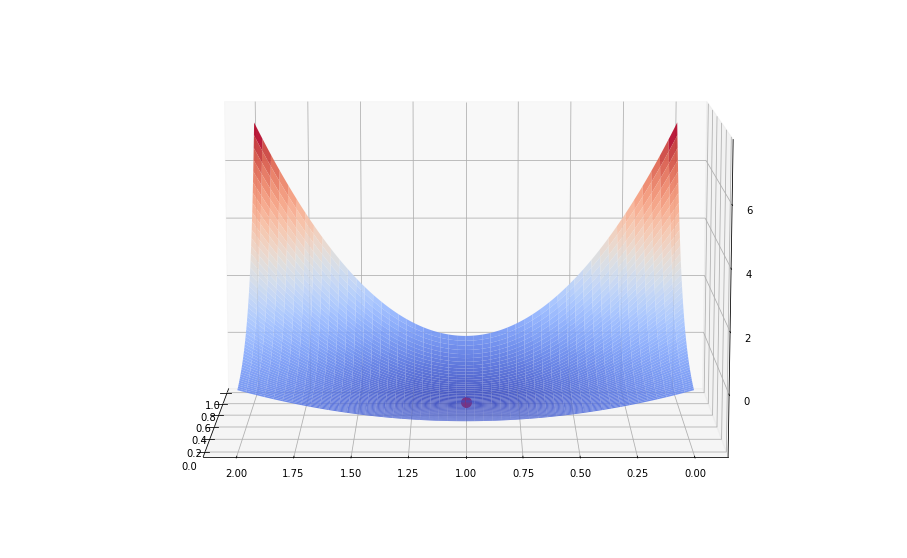

In [32]:
X, Y = np.meshgrid(np.linspace(0, 1, 1000), np.linspace(0, 2, 1000))

fig = plt.figure(figsize=(16, 10))

ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, f(X, Y), cmap=cm.coolwarm, alpha=0.9)
ax.scatter(x1, y1, f(x1, y1), marker='o', color='r', s=100)
ax.view_init(elev=10, azim=180)

plt.show()

## 3.a

Найдите максимум и минимум функции $f(x) = |4x-x^2| - \frac{2}{x-2}$ на отрезке [-1, 1]

#### 1. Точки излома:

$$
4x-x^2 = x(4-x) = 0 => x=0, x=4
$$

#### 2. Рассмотрим $4x-x^2\geq0$ => функция определена на [0, 4]

$$
\frac{df}{dx} = 
4-2x+\frac{2}{(x-2)^2}
$$

$$
\frac{df}{dx} = 0 =>
x -  2 = \frac{1}{(x-2)^2} =>
x-2=1 => x = 3
$$

Найдем вторую производную

$$
\frac{d^2f}{dx^2} = 
-2x-\frac{2}{(x-2)^3} =>
\frac{d^2f(3)}{dx^2} = -8 =>
x = 3- локальный \thinspaceмаксимум =>
$$

=> на интервале (0, 1] функция f(x) возрастает

#### 3. Рассмотрим $4x-x^2 < 0$ => функция определена на $(-\infty, 0), (4, +\infty)$

$$
\frac{df}{dx} = 
-4+2x+\frac{2}{(x-2)^2}
$$

$$
\frac{df}{dx} = 0 =>
-(x-2) = \frac{1}{(x-2)^2} =>
x-2=-1 => x = 1
$$

Найдем вторую производную

$$
\frac{d^2f}{dx^2} = 
2x-\frac{2}{(x-2)^3} =>
\frac{d^2f(1)}{dx^2} = 4 =>
x = 1 - локальный \thinspaceминимум =>
$$

=> на интервале [-1, 0) функция f(x) убывает

Из 2) и 3): x = 0 - минимум f(x) на отрезке [-1, 1]

Найдем максимум:

In [33]:
f = lambda x: np.abs(4*x-x**2)-2/(x-2)

In [34]:
f(-1), f(1)

(5.666666666666667, 5.0)

=> x = -1 - максимум f(x) на отрезке [-1, 1]

Проверим:

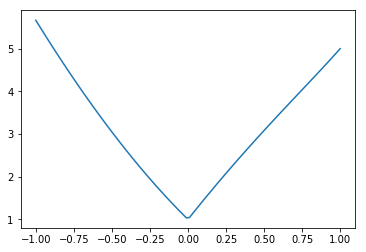

In [35]:
x = np.linspace(-1, 1, 100)

plt.plot(x, f(x))
plt.show()

## 3.b

Найдите максимум и минимум функции $f(x,y) = xy - x^2y - \frac{xy^2}{2} - 3$, если $0 \geq x \geq 1$ и $0 \geq y \geq 2$

$$
\frac{\partial f}{\partial x} = 
y-2xy-\frac{y^2}{2} = 
y(1-2x-\frac{y}{2})
$$

$$
\frac{\partial f}{\partial y} = 
x - x^2 -yx = 
x(1-x-y)
$$

Первый экстремум: (0, 0)

$$
\frac{\partial f}{\partial y} = 0 = >
x - x^2 -yx = 0 => y = 1 - x
$$

$$
\frac{\partial f}{\partial x} = 0 =>
y-2xy-\frac{y^2}{2} = (1-x) - 2x(1-x) - 0.5(1-x)^2 = 0
$$

$$
(1-x)(1-2x-0.5+0.5x) = (1-x)(0.5-1.5x) = 0 => x=1, x=\frac{1}{3}
$$

2ой и 3ий экстремумы: (1, 0), $(\frac{1}{3}, \frac{2}{3})$

$$
\frac{\partial^2 f}{\partial x^2} = 
-2y; \enspace
\frac{\partial^2 f}{\partial y^2} = 
-x; \enspace
\frac{\partial^2 f}{\partial x\partial y} = \frac{\partial^2 f}{\partial y\partial x} =
1-2x-y
$$

In [36]:
f = lambda x, y: x*y - x**2*y-0.5*x*y**2 - 3

part_f_x = lambda x, y: y - 2*x*y - 0.5*y**2
part_f_y = lambda x, y: x - x**2 - x*y

part_f_xx = lambda x, y: -2*y
part_f_yy = lambda x, y: -x
part_f_xy = part_f_yx = lambda x, y: 1-2*x-y

In [37]:
x1, y1 = 0, 0
x2, y2 = 1, 0
x3, y3 = 1/3, 2/3

In [38]:
print(part_f_x(x1, y1), part_f_y(x1, y1))
print(part_f_x(x2, y2), part_f_y(x2, y2))
print(part_f_x(x3, y3), part_f_y(x3, y3))

0.0 0
0.0 0
0.0 0.0


In [39]:
# Посчитаем миноры гессиана для 1ой точки

h1 = hess_f(x1, y1)
list(get_minors(h1))

[0.0, -1.0]

Неопределенный вариант => (0, 0) седловая точка

In [40]:
# Посчитаем миноры гессиана для 2ой точки

h2 = hess_f(x2, y2)
list(get_minors(h2))

[0.0, -1.0]

Неопределенный вариант => (1, 0) седловая точка

In [41]:
# Посчитаем миноры гессиана для 3ей точки

h3 = hess_f(x3, y3)
list(get_minors(h3))

[-1.333, 0.333]

Чередование - и + => (1, 0) локальный максимум

Экстремумы на границах:

1) x = 0 

$$
f(0,y) = -3
$$

$$
\frac{df}{dy} = 0
$$

Экстремумов нет

2) x = 1

$$
f(1,y) = y - y -0.5y^2-3 = -0.5y^2-3
$$

$$
\frac{df}{dy} = 
-y
$$

Локальный максимум: (1, 0)

2) y = 0

$$
f(x,0) = -3
$$

$$
\frac{df}{dx} = 0
$$

Экстремумов нет

2) y = 2

$$
f(x,2) = 2x - x^2 - 2x -3 = -x^2-3
$$

$$
\frac{df}{dx} = -2x
$$

Локальный максимум: (0, 2)

Посчитаем значения функции в углах и в точке локального максимума f(x,y):

In [42]:
points = [
    (0, 0),
    (0, 2),
    (1, 0),
    (1, 2),
    (1/3, 2/3),
]

for x, y in points:
    print(f'({x}, {y}): {f(x, y)}')

(0, 0): -3.0
(0, 2): -3.0
(1, 0): -3.0
(1, 2): -5.0
(0.3333333333333333, 0.6666666666666666): -2.925925925925926


Минимум функции: (1, 2), максимум функции: $(\frac{1}{3}, \frac{2}{3})$

Проверим:

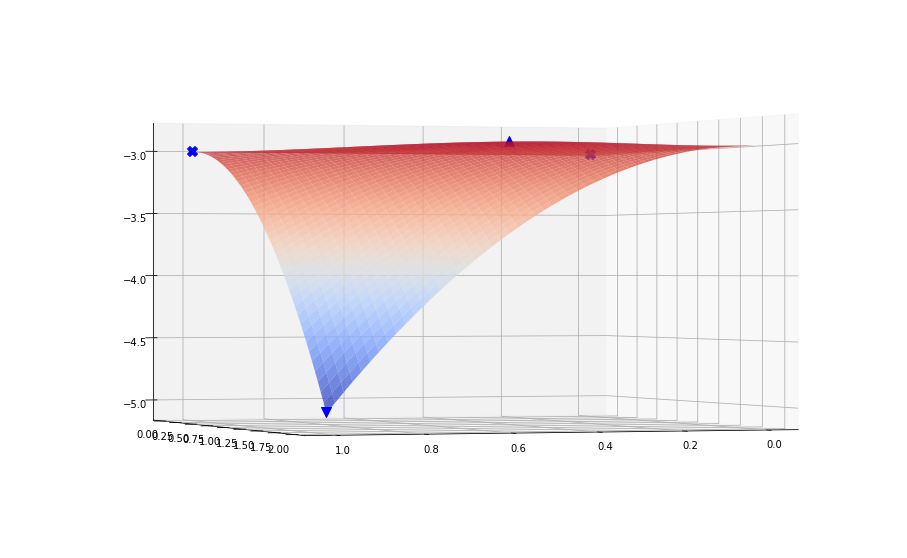

In [43]:
X, Y = np.meshgrid(np.linspace(0, 1, 1000), np.linspace(0, 2, 1000))

fig = plt.figure(figsize=(16, 10))
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, f(X, Y)-0.01, cmap=cm.coolwarm, alpha=0.8)

# седловые точки
ax.scatter(x1, y1, f(x1, y1), marker='X', color='b', s=100)
ax.scatter(x2, y2, f(x2, y2), marker='X', color='b', s=100)
# максимум
ax.scatter(x3, y3, f(x3, y3), marker='^', color='b', s=100)
# минимум
ax.scatter(1, 2, f(1, 2), marker='v', color='b', s=100)

ax.view_init(elev=0, azim=70)
plt.show()

## 4

С помощью МНК (метод наименьших квадратов) найдите лучшую аппроксимирующую функцию, имеющую форму параболы, для точек:

In [44]:
data = np.array([
    [0, -100],
    [1, -90],
    [2, -76],
    [3, -52],
    [4, -12],
    [5, 50],
])

Матрица со строками вида $(x_i^2\enspace x_i\enspace 1)$:

In [45]:
quad_x = lambda x: np.vstack([x**2, x, np.ones(x.shape[0])]).T

In [46]:
X = quad_x(data[:, 0])
y = data[:, 1].reshape(-1, 1)
X.shape, y.shape

((6, 3), (6, 1))

Аналитическое решение: $ W = (X^TX)^{-1}X^Ty $

In [47]:
W = np.linalg.inv(X.T @ X) @ X.T @ y

In [48]:
W.T

array([[  6.5,  -3.7, -97. ]])

Парабола имеет вид: $ y^* = 6.5x^2-3.7x-97 $

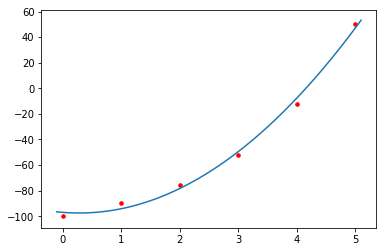

In [49]:
plt.figure(figsize=(6, 4))

x = np.linspace(-0.1, 5.1, 50)
y_pred = quad_x(x) @ W

plt.plot(x, y_pred)
plt.scatter(data[:, 0], data[:, 1], marker='.', color='r', s=50)
plt.show()